<a href="https://colab.research.google.com/github/Rishiii5455/Zeotap-Intership-Assignment/blob/main/Riyanshu_Rai_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


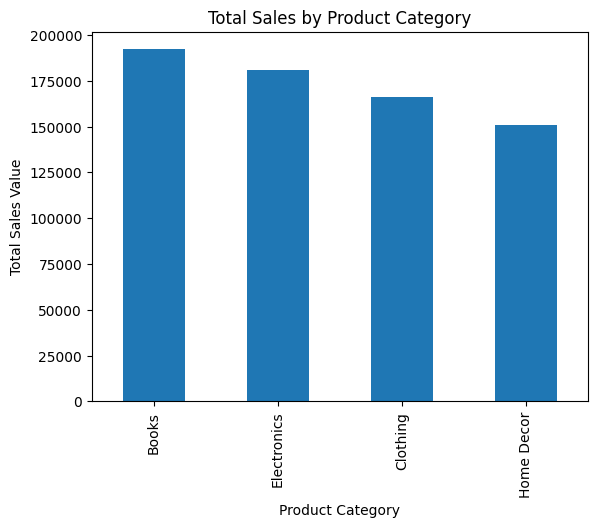

Top 10 Customers by Transaction Count:
 CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


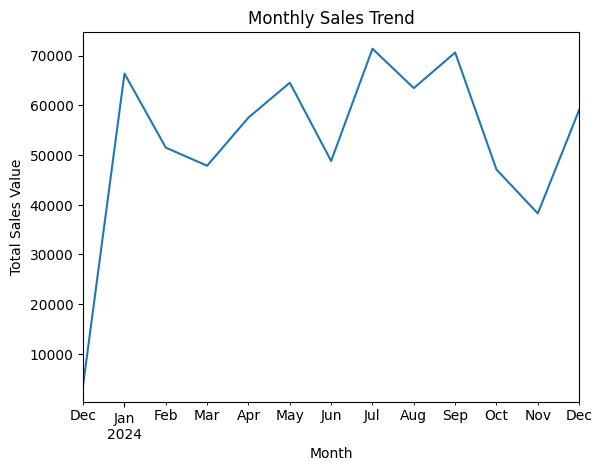

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for missing values and duplicates
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Example EDA
# 1. Total sales by product category
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', title='Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Value')
plt.show()

# 2. Most frequent customers
top_customers = merged_data['CustomerID'].value_counts().head(10)
print("Top 10 Customers by Transaction Count:\n", top_customers)

# 3. Sales trends over time
merged_data.set_index('TransactionDate').resample('ME')['TotalValue'].sum().plot(title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.show()